In [1]:
using DataFrames
using Plots

In [2]:
type NNparams
    a::Array{Float64}
end 
toyparams = NNparams([rand(),rand(),rand()])

NNparams([0.169884, 0.645101, 0.828618])

In [3]:
function σ(z::Float64)
    return 1.0 / (1.0 + exp(-z))
end
σ(.5)

0.6224593312018546

In [4]:
function updateNNparams(gradient::Array{Float64,1}, 
                        params::NNparams, learning_rate::Float64)
   params.a = params.a - gradient*learning_rate
    return params
end
#test
toyparams = NNparams([rand(),rand(),rand()])
grad = ∇(x,y,toyparams)
updateNNparams(grad,toyparams,.5)

LoadError: [91mUndefVarError: ∇ not defined[39m

In [5]:
function printNNparam(param::NNparams)
    @printf("PrintNN ==> %f %f %f\n", param.a[1], param.a[2], param.a[3])
    return
end

printNNparam (generic function with 1 method)

In [6]:
function output(params::NNparams, x::Array{Float64,1})
    #nb_data = size(x[1,:])
    #for i = 1:nb_data
    #x = x[i, :]
    return σ(dot(params.a,x))
    #end
end 

output (generic function with 1 method)

In [7]:
function loss(params::NNparams, yi::Array{Float64,1}, 
                x::Array{Float64,2})
    nb_data = size(x)[1]
     y_pred = zeros(length(yi))
    @assert(size(x)[1]== length(yi))
   for i = 1:nb_data
        y_pred[i]= output(params,x[i,:])
    end
    return sum(yi.*log.(1e-7+y_pred) .+ (1-yi).*log.(1e-7+1-y_pred))
end

loss (generic function with 1 method)

In [8]:
#gradient 
function ∇(x::Array{Float64,2},y::Array{Float64,1}, params::NNparams)
    grad = [0.0 for i=1:size(x)[2]]
    nb_data = size(x)[1]
    for i = 1:nb_data
        xi = x[i, :]
        yi = y[i]
        y_pred = output(params, xi)
        grad = grad .+ xi.*(yi - y_pred)
    end
    grad = grad/ nb_data
    return grad::Array{Float64,1}
end

∇ (generic function with 1 method)

In [9]:
function convertdata_to_array(dtf::DataFrame)
    nb_data = size(dtf)[1]
        x = zeros(Float64, nb_data, 3)
        
        x[:,1] = dtf[:x1]
        x[:,2] = dtf[:x2]
        x[:,3] = ones(Float64,size(x)[1])
        
        y = convert(Array, dtf[:y]) * 1.0
        #x = convert(Array, df[:x1], df[:x2], ones(Float64, size(x)[1]))
        return x,y
    end

convertdata_to_array (generic function with 1 method)

In [10]:
function init_params(x::Array{Float64,2})
    return [rand() for i = 1:size(x[1, :])[1]]
    end 
test = init_params(rand(4,4))
x= rand(5,5)
test

4-element Array{Float64,1}:
 0.822537 
 0.939647 
 0.793042 
 0.0891053

In [11]:
function select_trainingdata(x::Array{Float64,2}, y::Array{Float64,1}, batch_size::Int)
    nb_data = length(y)
    
    ids = [i for i = 1:nb_data]
    sampled_ids = sample(ids, batch_size)
    
    x_training = x[sampled_ids, :]
    y_training = y[sampled_ids]
    
    return x_training, y_training
end


select_trainingdata (generic function with 1 method)

In [12]:
x,y = convertdata_to_array(dtf)
testparams = init_params(x)

LoadError: [91mUndefVarError: dtf not defined[39m

In [13]:
function update_learning_rate(init_learning_rate::Float64, nb_steps::Int)
    return init_learning_rate* ((1.0)/ (1.0 + (.05*nb_steps)))
end

update_learning_rate (generic function with 1 method)

In [14]:
dtf = readtable("data.csv")
x,y = convertdata_to_array(dtf)
nb_steps = 1000

params = NNparams(init_params(x))
param_history_a1 = Float64[]
param_history_a2 = Float64[]
param_history_a3 = Float64[]
loss_history = Float64[]
output_history = Float64[]
grad_history = Float64[]
learning_rate_history = Float64[]

for s = 1:nb_steps  
    x_training,y_training = select_trainingdata(x,y,1000)
    grad = ∇(x_training, y_training, params)
    learning_rate = update_learning_rate(.07,s)
    params = updateNNparams(grad,params,learning_rate)
    result = output(params, x_training[s,:])
    loss_at_this_step = loss(params,y,x)
    @printf("Step %d / %d, loss = %f\n", s, nb_steps, loss_at_this_step)
    @printf("a_1 = %f, a_2 = %f, b = %f\n", params.a[1],params.a[2],
        params.a[3])
    @printf("\tgrad = %f\n", norm(grad))
    @printf("rate = %f\n",learning_rate)

    #push!(param_history,params)
    push!(param_history_a1, params.a[1])
    push!(param_history_a2, params.a[2])
    push!(param_history_a3, params.a[3])
    
    push!(loss_history, loss_at_this_step)
    
    #if s == 10
        #for i = 1:s
        #printNNparam(param_history[i])
        #end
    #end
    #for i = 1:length(x_training[:,1])
       push!(output_history,result)
    #end
end
print

Step 1 / 1000, loss = -1835.595863
a_1 = 0.723218, a_2 = 0.098086, b = 0.117513
	grad = 2.316462
rate = 0.066667
Step 2 / 1000, loss = -2211.614654
a_1 = 0.846337, a_2 = 0.177824, b = 0.144447
	grad = 2.343575
rate = 0.063636
Step 3 / 1000, loss = -2611.753696
a_1 = 0.973069, a_2 = 0.261276, b = 0.172157
	grad = 2.534117
rate = 0.060870
Step 4 / 1000, loss = -3035.246201
a_1 = 1.105752, a_2 = 0.348155, b = 0.200022
	grad = 2.760435
rate = 0.058333
Step 5 / 1000, loss = -3444.734395
a_1 = 1.227595, a_2 = 0.440292, b = 0.228007
	grad = 2.773205
rate = 0.056000
Step 6 / 1000, loss = -3833.163435
a_1 = 1.345697, a_2 = 0.527118, b = 0.254824
	grad = 2.767465
rate = 0.053846
Step 7 / 1000, loss = -4208.901303
a_1 = 1.464497, a_2 = 0.613101, b = 0.282515
	grad = 2.878242
rate = 0.051852
Step 8 / 1000, loss = -4523.239516
a_1 = 1.571560, a_2 = 0.686870, b = 0.307089
	grad = 2.646380
rate = 0.050000
Step 9 / 1000, loss = -4811.108151
a_1 = 1.676868, a_2 = 0.760108, b = 0.331052
	grad = 2.703010

	grad = 2.996745
rate = 0.010219
Step 118 / 1000, loss = -7767.127557
a_1 = 6.342336, a_2 = 4.036251, b = 1.399492
	grad = 2.611733
rate = 0.010145
Step 119 / 1000, loss = -7768.914324
a_1 = 6.364073, a_2 = 4.051698, b = 1.404487
	grad = 2.693689
rate = 0.010072
Step 120 / 1000, loss = -7770.646016
a_1 = 6.385708, a_2 = 4.066532, b = 1.409427
	grad = 2.669323
rate = 0.010000
Step 121 / 1000, loss = -7772.272719
a_1 = 6.405525, a_2 = 4.081102, b = 1.414272
	grad = 2.524864
rate = 0.009929
Step 122 / 1000, loss = -7773.973538
a_1 = 6.427076, a_2 = 4.096293, b = 1.419083
	grad = 2.718523
rate = 0.009859
Step 123 / 1000, loss = -7775.513717
a_1 = 6.447023, a_2 = 4.109921, b = 1.423597
	grad = 2.510238
rate = 0.009790
Step 124 / 1000, loss = -7777.121034
a_1 = 6.467654, a_2 = 4.124805, b = 1.428195
	grad = 2.659017
rate = 0.009722
Step 125 / 1000, loss = -7778.799544
a_1 = 6.489615, a_2 = 4.140244, b = 1.433205
	grad = 2.828382
rate = 0.009655
Step 126 / 1000, loss = -7780.406895
a_1 = 6.51

Step 235 / 1000, loss = -7864.289375
a_1 = 8.197994, a_2 = 5.331385, b = 1.822582
	grad = 2.534811
rate = 0.005490
Step 236 / 1000, loss = -7864.673619
a_1 = 8.210140, a_2 = 5.339426, b = 1.825261
	grad = 2.708344
rate = 0.005469
Step 237 / 1000, loss = -7865.049100
a_1 = 8.221718, a_2 = 5.347502, b = 1.827990
	grad = 2.639304
rate = 0.005447
Step 238 / 1000, loss = -7865.436798
a_1 = 8.233846, a_2 = 5.355909, b = 1.830720
	grad = 2.765522
rate = 0.005426
Step 239 / 1000, loss = -7865.798119
a_1 = 8.245291, a_2 = 5.363662, b = 1.833303
	grad = 2.601721
rate = 0.005405
Step 240 / 1000, loss = -7866.172044
a_1 = 8.256602, a_2 = 5.372208, b = 1.836017
	grad = 2.680511
rate = 0.005385
Step 241 / 1000, loss = -7866.551187
a_1 = 8.268691, a_2 = 5.380389, b = 1.838796
	grad = 2.770302
rate = 0.005364
Step 242 / 1000, loss = -7866.945271
a_1 = 8.281158, a_2 = 5.389153, b = 1.841638
	grad = 2.900994
rate = 0.005344
Step 243 / 1000, loss = -7867.311406
a_1 = 8.292746, a_2 = 5.397428, b = 1.84425

a_1 = 9.644808, a_2 = 6.349784, b = 2.153381
	grad = 2.608781
rate = 0.003406
Step 392 / 1000, loss = -7901.735171
a_1 = 9.651709, a_2 = 6.354467, b = 2.154985
	grad = 2.499173
rate = 0.003398
Step 393 / 1000, loss = -7901.895623
a_1 = 9.659456, a_2 = 6.360109, b = 2.156744
	grad = 2.874477
rate = 0.003390
Step 394 / 1000, loss = -7902.041972
a_1 = 9.666738, a_2 = 6.365016, b = 2.158401
	grad = 2.642586
rate = 0.003382
Step 395 / 1000, loss = -7902.196716
a_1 = 9.674120, a_2 = 6.370581, b = 2.160112
	grad = 2.786768
rate = 0.003373
Step 396 / 1000, loss = -7902.343768
a_1 = 9.681287, a_2 = 6.375658, b = 2.161808
	grad = 2.658007
rate = 0.003365
Step 397 / 1000, loss = -7902.489783
a_1 = 9.688822, a_2 = 6.380422, b = 2.163453
	grad = 2.700102
rate = 0.003357
Step 398 / 1000, loss = -7902.638753
a_1 = 9.696477, a_2 = 6.385394, b = 2.165097
	grad = 2.769233
rate = 0.003349
Step 399 / 1000, loss = -7902.777865
a_1 = 9.703373, a_2 = 6.390214, b = 2.166681
	grad = 2.562158
rate = 0.003341
St

Step 480 / 1000, loss = -7912.756639
a_1 = 10.240242, a_2 = 6.767501, b = 2.289146
	grad = 2.710062
rate = 0.002800
Step 481 / 1000, loss = -7912.859112
a_1 = 10.246144, a_2 = 6.771783, b = 2.290537
	grad = 2.656867
rate = 0.002794
Step 482 / 1000, loss = -7912.964803
a_1 = 10.252416, a_2 = 6.776070, b = 2.291965
	grad = 2.771688
rate = 0.002789
Step 483 / 1000, loss = -7913.065427
a_1 = 10.258020, a_2 = 6.780466, b = 2.293348
	grad = 2.606937
rate = 0.002783
Step 484 / 1000, loss = -7913.164264
a_1 = 10.263765, a_2 = 6.784598, b = 2.294701
	grad = 2.593676
rate = 0.002778
Step 485 / 1000, loss = -7913.263510
a_1 = 10.269730, a_2 = 6.788651, b = 2.296023
	grad = 2.644555
rate = 0.002772
Step 486 / 1000, loss = -7913.366342
a_1 = 10.275572, a_2 = 6.793116, b = 2.297432
	grad = 2.705833
rate = 0.002767
Step 487 / 1000, loss = -7913.469103
a_1 = 10.281825, a_2 = 6.797250, b = 2.298823
	grad = 2.761174
rate = 0.002761
Step 488 / 1000, loss = -7913.570420
a_1 = 10.287720, a_2 = 6.801562, b 

a_1 = 10.853345, a_2 = 7.199523, b = 2.429800
	grad = 2.696206
rate = 0.002288
Step 593 / 1000, loss = -7922.378986
a_1 = 10.858031, a_2 = 7.203004, b = 2.430908
	grad = 2.601695
rate = 0.002284
Step 594 / 1000, loss = -7922.450960
a_1 = 10.863018, a_2 = 7.206697, b = 2.432059
	grad = 2.767805
rate = 0.002280
Step 595 / 1000, loss = -7922.520170
a_1 = 10.867761, a_2 = 7.210254, b = 2.433197
	grad = 2.652162
rate = 0.002276
Step 596 / 1000, loss = -7922.590510
a_1 = 10.872667, a_2 = 7.213850, b = 2.434329
	grad = 2.722285
rate = 0.002273
Step 597 / 1000, loss = -7922.658601
a_1 = 10.877521, a_2 = 7.217251, b = 2.435423
	grad = 2.656281
rate = 0.002269
Step 598 / 1000, loss = -7922.732624
a_1 = 10.882897, a_2 = 7.220912, b = 2.436589
	grad = 2.917066
rate = 0.002265
Step 599 / 1000, loss = -7922.798904
a_1 = 10.887496, a_2 = 7.224337, b = 2.437670
	grad = 2.580020
rate = 0.002262
Step 600 / 1000, loss = -7922.863769
a_1 = 10.892041, a_2 = 7.227635, b = 2.438743
	grad = 2.531595
rate = 0.

a_1 = 11.502606, a_2 = 7.653888, b = 2.578060
	grad = 2.510154
rate = 0.001847
Step 739 / 1000, loss = -7930.785041
a_1 = 11.506276, a_2 = 7.656664, b = 2.578927
	grad = 2.538407
rate = 0.001845
Step 740 / 1000, loss = -7930.830859
a_1 = 11.510168, a_2 = 7.659292, b = 2.579810
	grad = 2.594183
rate = 0.001842
Step 741 / 1000, loss = -7930.881455
a_1 = 11.514466, a_2 = 7.662286, b = 2.580740
	grad = 2.891694
rate = 0.001840
Step 742 / 1000, loss = -7930.927496
a_1 = 11.518311, a_2 = 7.664967, b = 2.581646
	grad = 2.598530
rate = 0.001837
Step 743 / 1000, loss = -7930.974157
a_1 = 11.522158, a_2 = 7.667763, b = 2.582551
	grad = 2.638496
rate = 0.001835
Step 744 / 1000, loss = -7931.019217
a_1 = 11.525944, a_2 = 7.670396, b = 2.583429
	grad = 2.561991
rate = 0.001832
Step 745 / 1000, loss = -7931.063240
a_1 = 11.529704, a_2 = 7.672898, b = 2.584298
	grad = 2.512802
rate = 0.001830
Step 746 / 1000, loss = -7931.107973
a_1 = 11.533388, a_2 = 7.675566, b = 2.585184
	grad = 2.535684
rate = 0.

Step 815 / 1000, loss = -7934.134023
a_1 = 11.797049, a_2 = 7.859305, b = 2.644995
	grad = 2.811193
rate = 0.001677
Step 816 / 1000, loss = -7934.173862
a_1 = 11.800600, a_2 = 7.861780, b = 2.645829
	grad = 2.632070
rate = 0.001675
Step 817 / 1000, loss = -7934.216604
a_1 = 11.804441, a_2 = 7.864510, b = 2.646673
	grad = 2.862115
rate = 0.001673
Step 818 / 1000, loss = -7934.255693
a_1 = 11.807949, a_2 = 7.866953, b = 2.647479
	grad = 2.604011
rate = 0.001671
Step 819 / 1000, loss = -7934.295518
a_1 = 11.811526, a_2 = 7.869454, b = 2.648295
	grad = 2.660957
rate = 0.001669
Step 820 / 1000, loss = -7934.335644
a_1 = 11.815143, a_2 = 7.871959, b = 2.649121
	grad = 2.686032
rate = 0.001667
Step 821 / 1000, loss = -7934.376170
a_1 = 11.818798, a_2 = 7.874485, b = 2.649960
	grad = 2.716377
rate = 0.001665
Step 822 / 1000, loss = -7934.417430
a_1 = 11.822572, a_2 = 7.877031, b = 2.650807
	grad = 2.784729
rate = 0.001663
Step 823 / 1000, loss = -7934.455104
a_1 = 11.825956, a_2 = 7.879383, b 

a_1 = 12.100063, a_2 = 8.072916, b = 2.714393
	grad = 2.810721
rate = 0.001517
Step 904 / 1000, loss = -7937.451643
a_1 = 12.103247, a_2 = 8.075102, b = 2.715108
	grad = 2.592291
rate = 0.001515
Step 905 / 1000, loss = -7937.486784
a_1 = 12.106513, a_2 = 8.077556, b = 2.715872
	grad = 2.745905
rate = 0.001514
Step 906 / 1000, loss = -7937.520620
a_1 = 12.109706, a_2 = 8.079878, b = 2.716608
	grad = 2.656676
rate = 0.001512
Step 907 / 1000, loss = -7937.554697
a_1 = 12.112971, a_2 = 8.082169, b = 2.717354
	grad = 2.686569
rate = 0.001510
Step 908 / 1000, loss = -7937.588430
a_1 = 12.116263, a_2 = 8.084421, b = 2.718075
	grad = 2.686402
rate = 0.001509
Step 909 / 1000, loss = -7937.623110
a_1 = 12.119574, a_2 = 8.086727, b = 2.718858
	grad = 2.727426
rate = 0.001507
Step 910 / 1000, loss = -7937.656099
a_1 = 12.122741, a_2 = 8.088915, b = 2.719598
	grad = 2.604398
rate = 0.001505
Step 911 / 1000, loss = -7937.689284
a_1 = 12.125998, a_2 = 8.091056, b = 2.720344
	grad = 2.638613
rate = 0.

print (generic function with 45 methods)


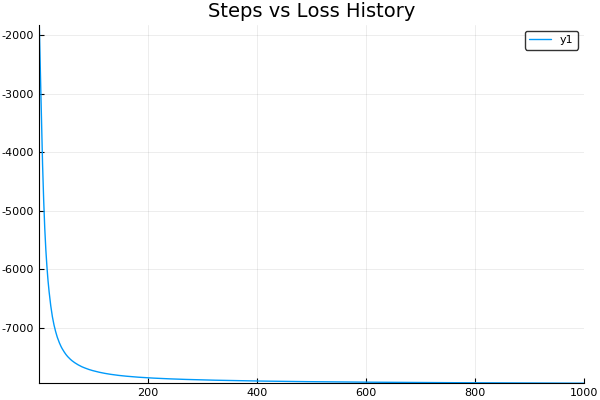

In [18]:
x = [i for i= 1:nb_steps] ; y = loss_history
plot(x,y)
title!("Steps vs Loss History")


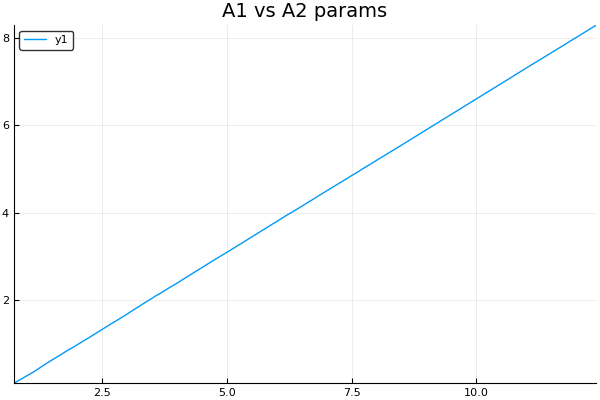

In [16]:
x = param_history_a1;
y = param_history_a2
plot(x,y)
title!("A1 vs A2 params")


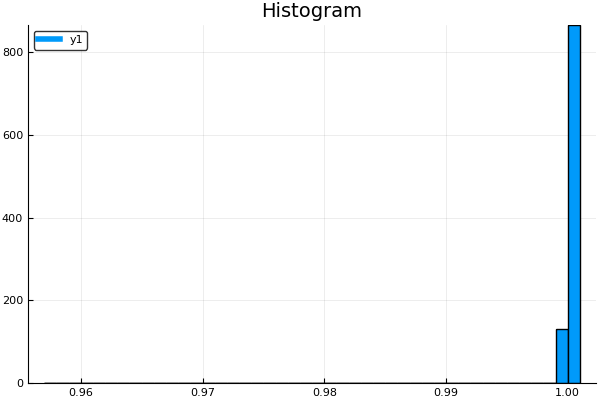

In [20]:
# Histogram of Final Output
histogram(output_history, bins= 50)
title!("Histogram")


In [22]:
output_history

1000-element Array{Float64,1}:
 0.996958
 0.992427
 0.999961
 0.999105
 0.9993  
 0.99997 
 0.999974
 0.999349
 0.957532
 1.0     
 1.0     
 1.0     
 1.0     
 ⋮       
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     
 1.0     

In [23]:
sum(y_training.==1)

LoadError: [91mUndefVarError: y_training not defined[39m